In [1]:
import pandas as pd
import numpy as np

### 读取数据

In [2]:
df = pd.read_csv("./car_price.csv")

In [3]:
df.head(3)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [5]:
df.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

In [6]:
df.dropna(inplace=True)

### 数据的清晰处理

In [7]:
df.head(3)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0


In [8]:
df["mileage"] = df["mileage"].map(lambda x : float(x.split(" ")[0]))
df["mileage"].head(3)

0    23.40
1    21.14
2    17.70
Name: mileage, dtype: float64

In [9]:
df["engine"] = df["engine"].map(lambda x : float(x.split(" ")[0]))
df["engine"].head(3)

0    1248.0
1    1498.0
2    1497.0
Name: engine, dtype: float64

In [10]:
df["max_power"] = df["max_power"].map(lambda x : float(x.split(" ")[0]))
df["max_power"].head(3)

0     74.00
1    103.52
2     78.00
Name: max_power, dtype: float64

In [11]:
# 12.7@ 2,700(kgm@ rpm)	

import re

def parse_rpm(torque):
    torque = torque.replace(",", "")
    return max([float(x) for x in re.findall("\d+", torque)])

df["torque"] = df["torque"].map(parse_rpm)
df["torque"].head(3)

0    2000.0
1    2500.0
2    2700.0
Name: torque, dtype: float64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7906 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           7906 non-null   object 
 1   year           7906 non-null   int64  
 2   selling_price  7906 non-null   int64  
 3   km_driven      7906 non-null   int64  
 4   fuel           7906 non-null   object 
 5   seller_type    7906 non-null   object 
 6   transmission   7906 non-null   object 
 7   owner          7906 non-null   object 
 8   mileage        7906 non-null   float64
 9   engine         7906 non-null   float64
 10  max_power      7906 non-null   float64
 11  torque         7906 non-null   float64
 12  seats          7906 non-null   float64
dtypes: float64(5), int64(3), object(5)
memory usage: 864.7+ KB


In [13]:
df.head(3)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,2000.0,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,2500.0,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,2700.0,5.0


### 数据的统计分析

In [14]:
df.drop(columns=["name"], inplace=True)
df.head(3)

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,2000.0,5.0
1,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,2500.0,5.0
2,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,2700.0,5.0


In [15]:
df.select_dtypes(include=["object"]).describe()

,fuel,seller_type,transmission,owner
count,7906,7906,7906,7906
unique,4,3,2,5
top,Diesel,Individual,Manual,First Owner
freq,4299,6563,6865,5215


In [16]:
df.select_dtypes(include=["float"]).describe()

,mileage,engine,max_power,torque,seats
count,7906.000000,7906.000000,7906.000000,7906.000000,7906.000000
mean,19.419861,1458.708829,91.587374,3069.864154,5.416393
std,4.036263,503.893057,35.747216,943.662100,0.959208
min,0.000000,624.000000,32.800000,400.000000,2.000000
25%,16.780000,1197.000000,68.050000,2400.000000,5.000000
50%,19.300000,1248.000000,82.000000,3000.000000,5.000000
75%,22.320000,1582.000000,102.000000,4000.000000,5.000000
max,42.000000,3604.000000,400.000000,21800.000000,14.000000


In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
!pip install seaborn

You should consider upgrading via the 'pip install --upgrade pip' command.


<AxesSubplot:>

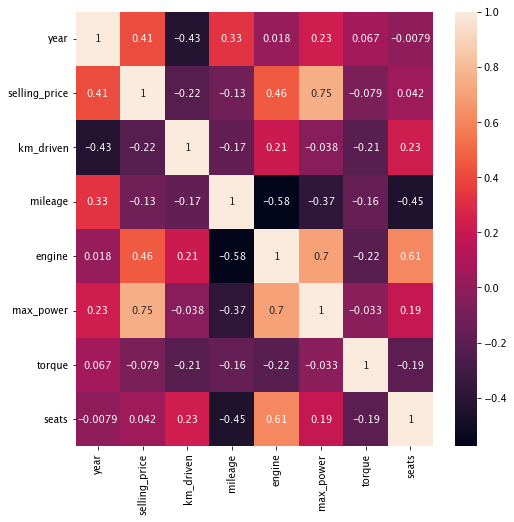

In [19]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(), annot=True)

### 特征工程

#### 分类字段one-hot

In [20]:
cat_columns = ["fuel", "seller_type", "transmission", "owner"]

In [21]:
from sklearn.preprocessing import OneHotEncoder

In [22]:
oneHotEncoder = OneHotEncoder(drop='first')

In [23]:
cat_features = oneHotEncoder.fit_transform(df[cat_columns]).toarray()
cat_features

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 1.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

#### 数值字段-标准化

In [24]:
num_columns = ["mileage", "engine", "max_power", "torque", "seats"]

In [25]:
from sklearn.preprocessing import StandardScaler

In [26]:
standardScaler = StandardScaler()

In [27]:
num_features = standardScaler.fit_transform(df[num_columns])
num_features

array([[ 0.98615741, -0.41818825, -0.49202393, -1.13380819, -0.4341278 ],
       [ 0.42619816,  0.07798015,  0.33382687, -0.60392401, -0.4341278 ],
       [-0.42612921,  0.07599548, -0.38012003, -0.39197033, -0.4341278 ],
       ...,
       [-0.02969788, -0.41818825, -0.49482153, -1.13380819, -0.4341278 ],
       [ 1.02827824, -0.12445656, -0.60392784, -0.07403982, -0.4341278 ],
       [ 1.02827824, -0.12445656, -0.60392784, -0.07403982, -0.4341278 ]])

#### 构建X和Y

In [28]:
X = np.hstack([cat_features, num_features])
X

array([[ 1.        ,  0.        ,  0.        , ..., -0.49202393,
        -1.13380819, -0.4341278 ],
       [ 1.        ,  0.        ,  0.        , ...,  0.33382687,
        -0.60392401, -0.4341278 ],
       [ 0.        ,  0.        ,  1.        , ..., -0.38012003,
        -0.39197033, -0.4341278 ],
       ...,
       [ 1.        ,  0.        ,  0.        , ..., -0.49482153,
        -1.13380819, -0.4341278 ],
       [ 1.        ,  0.        ,  0.        , ..., -0.60392784,
        -0.07403982, -0.4341278 ],
       [ 1.        ,  0.        ,  0.        , ..., -0.60392784,
        -0.07403982, -0.4341278 ]])

In [29]:
y = df["selling_price"].to_numpy()
y

array([450000, 370000, 158000, ..., 382000, 290000, 290000])

### 模型训练

#### 数据集划分

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [32]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6324, 15), (1582, 15), (6324,), (1582,))

#### 随机森林

In [33]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score

In [34]:
random_model = RandomForestRegressor(n_estimators=300, random_state=42, n_jobs=-1)

In [35]:
random_model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=300, n_jobs=-1, random_state=42)

In [36]:
y_pred = random_model.predict(X_test)
y_pred

array([187152.13199735, 682842.19100397, 165660.05582381, ...,
       323886.35635594, 956306.90671236, 454964.70999045])

In [37]:
random_model.score(X_train, y_train)

0.9806247928815699

In [38]:
random_model.score(X_test, y_test)

0.9366499810264303

### 训练线性回归模型

In [39]:
from sklearn.linear_model import LinearRegression

In [40]:
lr_model = LinearRegression()

In [41]:
lr_model.fit(X_train, y_train)

LinearRegression()

In [42]:
lr_model.score(X_train, y_train)

0.681894079529991

In [43]:
lr_model.score(X_test, y_test)

0.6469446348543998

### 存储模型

In [44]:
model_dir = "./flask-carprice/models"

In [45]:
import joblib

In [46]:
joblib.dump(random_model, f"{model_dir}/random_model.joblib")

['./flask-carprice/models/random_model.joblib']

In [47]:
joblib.dump(oneHotEncoder, f"{model_dir}/oneHotEncoder.joblib")

['./flask-carprice/models/oneHotEncoder.joblib']

In [48]:
joblib.dump(standardScaler, f"{model_dir}/standardScaler.joblib")

['./flask-carprice/models/standardScaler.joblib']

In [50]:
df.sample(1).to_json()

'{"year":{"6046":2017},"selling_price":{"6046":2100000},"km_driven":{"6046":48000},"fuel":{"6046":"Diesel"},"seller_type":{"6046":"Individual"},"transmission":{"6046":"Automatic"},"owner":{"6046":"Second Owner"},"mileage":{"6046":17.9},"engine":{"6046":2143.0},"max_power":{"6046":136.0},"torque":{"6046":3000.0},"seats":{"6046":5.0}}'